<a href="https://colab.research.google.com/github/AhmetSarici/Datasetler-Uzerine-Uygulamalar/blob/main/PokemonVS_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.getcwd()

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/Kaggle'

In [3]:
zip_path = '/content/drive/My Drive/Colab Notebooks/Kaggle'

os.getcwd()

!cp '{zip_path}' .

!unzip -q 'pokemon-challenge.zip'

os.listdir()

cp: -r not specified; omitting directory '/content/drive/My Drive/Colab Notebooks/Kaggle'
unzip:  cannot find or open pokemon-challenge.zip, pokemon-challenge.zip.zip or pokemon-challenge.zip.ZIP.


['.config', 'drive', 'sample_data']

In [4]:
!pwd

/content


In [5]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:

os.chdir('/content/drive/My Drive/Colab Notebooks/Kaggle')

!kaggle datasets download -d terminus7/pokemon-challenge

os.listdir()

pokemon-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


['kaggle.json',
 'pokemon-challenge.zip',
 'graph.png',
 'combats.csv',
 'tests.csv',
 'pokemon.csv']

In [7]:

zip_path = '/content/drive/My Drive/Colab Notebooks/Kaggle'

os.getcwd()

!cp '{zip_path}' .

!unzip -q 'pokemon-challenge.zip'

os.listdir()

cp: -r not specified; omitting directory '/content/drive/My Drive/Colab Notebooks/Kaggle'
replace combats.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace pokemon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace tests.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


['kaggle.json',
 'pokemon-challenge.zip',
 'graph.png',
 'combats.csv',
 'tests.csv',
 'pokemon.csv']

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

In [9]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [11]:
#feature lar arasında ilişkisi incelemek için
#iki feature arasındaki corralation 1 ise birbiri ile doğru orantılı
#evin oda sayısı artarsa fiyat artar pozitif corelatite
#evin şehir merkezine uzaklığı ile fiyatı ters orantılı negatif 

#Eğer 1'e yakınsa doğru orantılı
#-1'e yakınsa ters orantılı
#0 çıkarsa ilişki yok
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


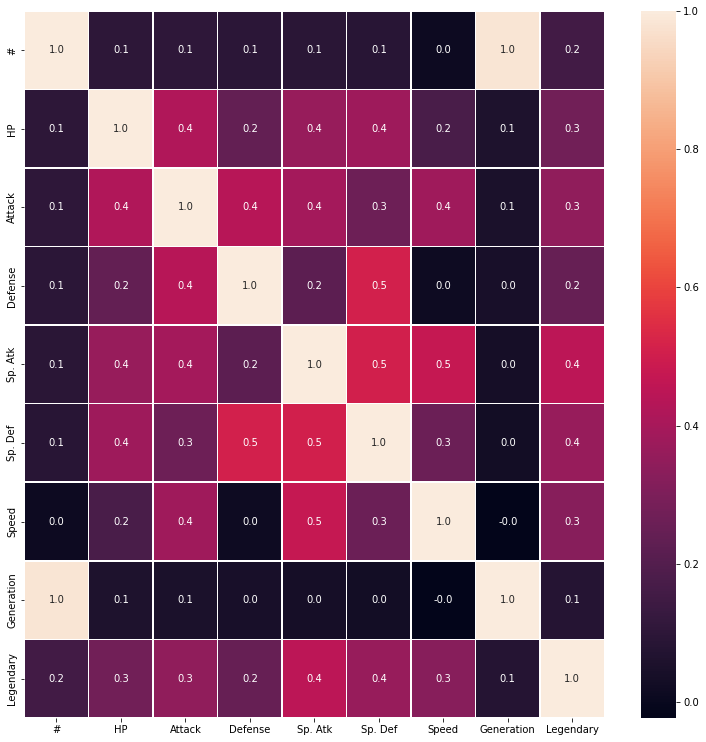

In [12]:
#correlation map

f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
#annot    :Sayıların görünmesi
#linewidth:çizgi kalınlığı
#fmt      :Sıfırdan sonra yazacak sayı
#ax       :ölçü

In [13]:
#Kolonlar
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

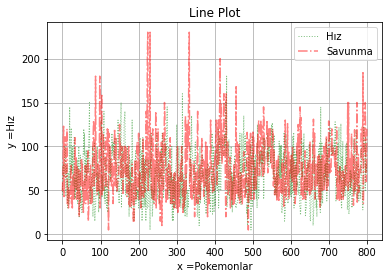

In [14]:
# Line Plot
#  alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Hız',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Savunma',linewidth=1.5, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x =Pokemonlar')              # label = name of label
plt.ylabel('y =Hız')
plt.title('Line Plot')            # title = title of plot
plt.show()
#x: pokemonlar
#y: hızları

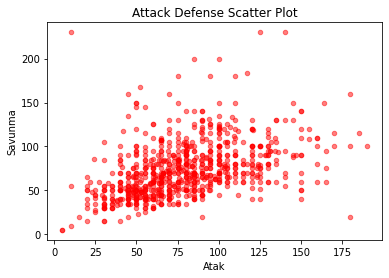

In [15]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red');
plt.xlabel('Atak');             # label = name of label
plt.ylabel('Savunma');
plt.title('Attack Defense Scatter Plot'); 

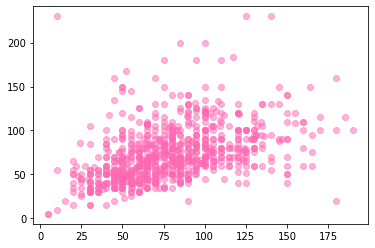

In [16]:
plt.scatter(data.Attack, data.Defense, color = 'hotpink',alpha=0.5);

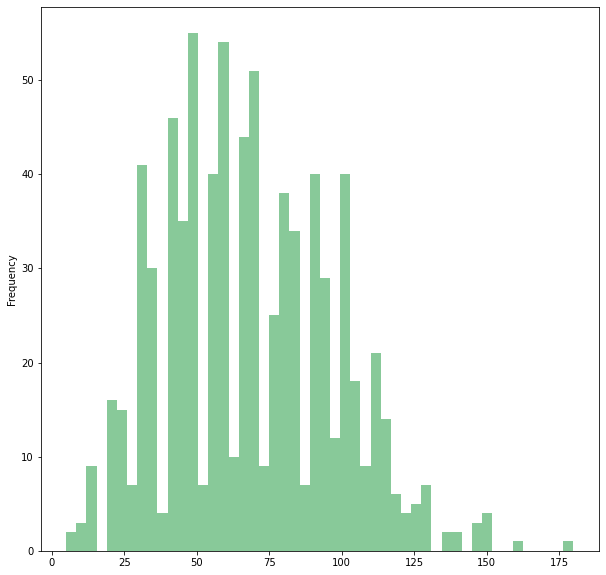

In [17]:
# Histogram
# bins = number of bar in figure
#pokemonların hız değerleri

data.Speed.plot(kind = 'hist',bins = 50,figsize = (10,10),color="#88c999")
plt.show()

In [18]:
x = data['Defense']>200     
data[x] 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [19]:
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [20]:
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [21]:
threshold = sum(data.Speed)/len(data.Speed)
print(threshold)

68.2775


In [22]:
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


Data Cleaning

In [23]:
data2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/pokemon.csv')
data2.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [25]:
data2.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [26]:
data2.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [27]:
data2.shape

(800, 12)

In [28]:
#NaN değer sayısı
print(data2['Type 1'].value_counts(dropna =False)) 

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [29]:
data2.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


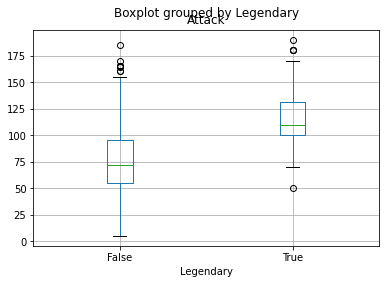

In [30]:
data2.boxplot(column='Attack',by = 'Legendary');
plt.show();

In [31]:
data_new = data2.head()    
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [32]:
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


In [33]:
type(melted)

pandas.core.frame.DataFrame

In [34]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      10 non-null     object
 1   variable  10 non-null     object
 2   value     10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [35]:
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


In [36]:
data_1 = data2.head()
data_2= data2.tail()
conc_data_row = pd.concat([data_1,data_2],axis =0) # axis = 0 : satır olarak
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [37]:
data_1 = data2.head()
data_2= data2.tail()
conc_data_row = pd.concat([data_1,data_2],axis =0,ignore_index =True) # ignore_index =True yeniden sıralı
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [38]:
data_1 = data2['Attack'].head()
data_2= data2['Defense'].head()
conc_data_col = pd.concat([data_1,data_2],axis =1) # axis = 1 : sütun olarak birleştirme
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [39]:
data2.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [40]:
type(data2)

pandas.core.frame.DataFrame

In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [42]:
#tip değiştirme
data2['Type 1'] = data2['Type 1'].astype('category')
data2['Speed'] = data2['Speed'].astype('float')

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [44]:
data2.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [45]:
data2.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45.0,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60.0,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80.0,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80.0,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65.0,1,False


In [47]:
data2["Type 2"].value_counts(dropna =False)
#dropna =True :null olanları listeden çıkart

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [48]:
dataD=data2   # 
dataD["Type 2"].dropna(inplace = True)

In [55]:
assert 1==1

In [57]:
assert  dataD['Type 2'].notnull().all()

AssertionError: ignored

In [59]:
dataD["Type 2"].fillna('empty',inplace = True)

In [62]:
assert  dataD['Type 2'].notnull().all() #hiçbirinde null değeri yoksa çıktı vermez

Hiyerarşik İndex

In [63]:
data3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/pokemon.csv')
data3.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [64]:
df = data3.set_index(["Type 1","Type 2"]) 
df.head(50)

#              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1   Type 2                                                                 
Grass    Poison   1         Bulbasaur   45      49       49       65       65   
         Poison   2           Ivysaur   60      62       63       80       80   
         Poison   3          Venusaur   80      82       83      100      100   
         Poison   4     Mega Venusaur   80     100      123      122      120   
Fire     NaN      5        Charmander   39      52       43       60       50   
         NaN      6        Charmeleon   58      64       58       80       65   
         Flying   7         Charizard   78      84       78      109       85   
         Dragon   8  Mega Charizard X   78     130      111      130       85   
         Flying   9  Mega Charizard Y   78     104       78      159      115   
Water    NaN     10          Squirtle   44      48       65       50       64   
         NaN     11         Wartortle   59      63       80       65       80   
         NaN     12         Blastoise   79      83      100       85      105   
         NaN     13    Mega Blastoise   79     103      120      135      115   
Bug      NaN     14          Caterpie   45      30       35       20       20   
         NaN     15           Metapod   50      20       55       25       25   
         Flying  16        Butterfree   60      45       50       90       80   
         Poison  17            Weedle   40      35       30       20       20   
         Poison  18            Kakuna   45      25       50       25       25   
         Poison  19          Beedrill   65      90       40       45       80   
         Poison  20     Mega Beedrill   65     150       40       15       80   
Normal   Flying  21            Pidgey   40      45       40       35       35   
         Flying  22         Pidgeotto   63      60       55       50       50   
         Flying  23           Pidgeot   83      80       75       70       70   
         Flying  24      Mega Pidgeot   83      80       80      135       80   
         NaN     25           Rattata   30      56       35       25       35   
         NaN     26          Raticate   55      81       60       50       70   
         Flying  27           Spearow   40      60       30       31       31   
         Flying  28            Fearow   65      90       65       61       61   
Poison   NaN     29             Ekans   35      60       44       40       54   
         NaN     30             Arbok   60      85       69       65       79   
Electric NaN     31           Pikachu   35      55       40       50       50   
         NaN     32            Raichu   60      90       55       90       80   
Ground   NaN     33         Sandshrew   50      75       85       20       30   
         NaN     34         Sandslash   75     100      110       45       55   
Poison   NaN     35          Nidoran♀   55      47       52       40       40   
         NaN     36          Nidorina   70      62       67       55       55   
         Ground  37         Nidoqueen   90      92       87       75       85   
         NaN     38          Nidoran♂   46      57       40       40       40   
         NaN     39          Nidorino   61      72       57       55       55   
         Ground  40          Nidoking   81     102       77       85       75   
Fairy    NaN     41          Clefairy   70      45       48       60       65   
         NaN     42          Clefable   95      70       73       95       90   
Fire     NaN     43            Vulpix   38      41       40       50       65   
         NaN     44         Ninetales   73      76       75       81      100   
Normal   Fairy   45        Jigglypuff  115      45       20       45       25   
         Fairy   46        Wigglytuff  140      70       45       85       50   
Poison   Flying  47             Zubat   40      45       35       30       40   
         Flying  48            Golbat   75      8